<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Sesión Sincrónica Semana 2.

El objetivo de este cuaderno es cubrir las dudas, preguntas, y dificultades que detectamos en los trabajos entregados en la Semana 1 y hacer una introducción a la temática tratada en la semana 2.


**NO** es necesario editar el archivo o hacer una entrega. Los ejemplos contienen celdas con código ejecutable (`en gris`), que podrá modificar libremente. Esta puede ser una buena forma de aprender nuevas funcionalidades del *cuaderno*, o experimentar variaciones en los códigos de ejemplo.

# PCA

- Los datos suelen venir con información, redundancia y ruido. 


- Nuestro objetivo siempre es extraer la máxima información posible de los datos mientras reducimos el ruido e ignoramos la información redundante. 


- Al hacer esto esamos reduciendo la dimensión y es uno de los objetivo de PCA


- PCA nos permite resumir este conjunto de datos en un número pequeño de variables representativas.


- Para ello busca transformar los datos de forma tal que tengamos la máxima información posible. 


- Como se mide información? En PCA y en otrós metodos estadísticos utilizamos la varianza. 


- Si algo varía más entonces tiene más información.


- PCA identifica entonces eje que representa la mayor cantidad de variación en los datos.

- Como lo hace? A través de combinaciones lineales

## Importancia de Estandarizar: Ejemplo

In [ ]:
#Cargamos las librerías a utilizar
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

np.set_printoptions(precision=2)

In [ ]:
import pandas as pd

# Cargamos y visualizamos la primeras observaciones de los datos
X2 = pd.read_csv('data/simulated_data1.csv')
X2.head()

In [ ]:
X2.describe()

In [ ]:
X2.cov()

In [ ]:
from pca import pca

model = pca()

results = model.fit_transform(X2, verbose=False)

# Plot explained variance
fig, ax = model.plot()

In [ ]:
#ver los pesos o loadings
loadings_pca=model.results['loadings'].transpose()
loadings_pca

In [ ]:
#PCA estandarizado
model_norm = pca( normalize=True, verbose=False)

# Fit transform
results_norm = model_norm.fit_transform(X2)

# Plot explained variance
fig, ax = model_norm.plot()

In [ ]:
X2.plot.scatter(x="X1", y="X2", c ="blue")

In [ ]:
X2_std = (X2 - X2.mean())/X2.std()

X2_std.plot.scatter(x="X1", y="X2", c ="blue")

---


## PCA como filtro de ruido: Dígitos escritos a mano

- El PCA también puede usarse como un enfoque de filtrado para datos con ruido.

- La idea es, cualquier componente con una varianza mucho mayor que el efecto del ruido debería verse relativamente poco afectado por el ruido. Por lo tanto, si reconstruyes los datos utilizando solo el subconjunto más grande de componentes principales, deberías estar conservando preferentemente la señal y eliminando el ruido.


- Veamos cómo se ve esto con los [datos de dígitos](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) disponibles en los datos de [scikit-learn](https://scikit-learn.org/stable/). 


Comenzamos cargando los datos:


In [ ]:
from sklearn.datasets import load_digits

from sklearn.decomposition import PCA


digits = load_digits()
digits.data.shape

- Vamos a graficar algunos de los datos de entrada sin ruido, teniendo en cuenta que son imágenes de 8×8 píxeles. :

In [ ]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Ahora, agreguemos algo de ruido aleatorio para crear un conjunto de datos ruidoso (aumentamos la varianza) y volvamos a graficarlo:



In [ ]:
np.random.seed(42)

# agregamos "varianza"
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

A simple vista, es evidente que las imágenes están ruidosas y contienen píxeles que no aportan información. 

Vamos a entrenar un PCA en los datos ruidosos, solicitando que la proyección preserve el 50% de la varianza:

In [ ]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

Aquí, el 50% de la varianza equivale a 12 componentes principales. Ahora, calculamos estos componentes y luego utilizamos la inversa de la transformación para reconstruir los dígitos filtrados:



In [ ]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

- PCA tiene la capacidad de conservar la señal importante y filtrar el ruido. Esto es especialmente útil cuando trabajamos con datos que pueden estar contaminados con ruido aleatorio.
  
- Esta propiedad convierte a PCA en una herramienta poderosa para seleccionar las características más relevantes de los datos.

- En lugar de entrenar un clasificador con datos de alta dimensionalidad (lo que puede ser costoso y propenso a errores), puedes entrenarlo usando una representación de menor dimensión generada por PCA.

- Al reducir la dimensionalidad, PCA no solo hace que el proceso de entrenamiento sea más eficiente, sino que también ayuda a eliminar el ruido aleatorio en las entradas, mejorando la precisión del clasificador.


### PCA para visualización

- Para obtener una mejor intuición sobre las relaciones entre estos puntos, podemos usar PCA para proyectarlos a un número de dimensiones más manejable, digamos dos

- Los datos consisten en imágenes de 8×8 píxeles, lo que significa que son de 64 dimensiones.

In [ ]:
pca = PCA(2)  # projectar de 64 a 2 dimensiones
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

Ahora podemos graficar los dos primeros componentes principales de cada punto para aprender más sobre los datos:


In [ ]:
plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura, en este caso, 10x8 pulgadas

plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

plt.show()  # Muestra la figura

- Esta proyección nos permite visualizar cómo se distribuyen los dígitos en estas dos nuevas dimensiones, que son las que capturan la mayor parte de la información importante.

- Esencialmente, hemos encontrado una manera de representar la información más importante de los datos (originalmente en 64 dimensiones) en solo 2 dimensiones. Esta simplificación nos permite ver patrones y diferencias entre los dígitos de manera más clara, sin necesidad de saber de antemano cuáles son los dígitos.

- Lo hicimos de manera no supervisada, lo que significa que encontramos estas direcciones importantes sin usar ninguna información sobre qué dígito es cada punto (es decir, sin usar las etiquetas de los datos).

### ¿Qué significan los componentes?

Cuando reducimos la dimensión de los datos con PCA, los datos originales (en este caso, imágenes de dígitos) se representan en un espacio más pequeño. Pero, ¿qué significan realmente estas nuevas dimensiones?

Imagina que cada imagen está formada por 64 valores, uno para cada píxel. Estos valores se organizan en un vector llamado \( x \), que luce algo así:

$$
x = [x_1, x_2, x_3, \cdots, x_{64}]
$$

#### Construcción de la imagen

Podemos pensar en la construcción de la imagen como una combinación de estos píxeles:

- Multiplicamos cada valor del vector \( x \) por el píxel correspondiente en la imagen.
- Luego, sumamos todos esos productos para reconstruir la imagen completa.

Esto se ve así:

$$
\text{imagen}(x) = x_1 \cdot \text{(píxel 1)} + x_2 \cdot \text{(píxel 2)} + x_3 \cdot \text{(píxel 3)} + \cdots + x_{64} \cdot \text{(píxel 64)}
$$

#### Reducción de Dimensión

Ahora, si quisiéramos reducir la dimensión de estos datos, una forma de hacerlo sería poner a cero la mayoría de estos valores y dejar solo unos pocos.

Por ejemplo, si solo usamos los primeros 8 valores (correspondientes a los primeros 8 píxeles), obtendríamos una versión simplificada de la imagen en un espacio de solo 8 dimensiones. Pero, esta versión no representaría muy bien la imagen completa, porque habríamos descartado casi el 90% de los píxeles.

### ¿Por qué importa?

La reducción de dimensión con PCA no solo elige algunos píxeles al azar; en lugar de eso, encuentra las combinaciones de píxeles que mejor representan la variación en las imágenes, asegurándose de que la información más importante se conserve incluso en un espacio más pequeño.


In [ ]:
#from sklearn.datasets import load_digits
import seaborn as sns

digits = load_digits()
sns.set_style('white')



def plot_pca_components(x, coefficients=None, mean=0, components=None,
                        imshape=(8, 8), n_components=8, fontsize=12,
                        show_mean=True):
    if coefficients is None:
        coefficients = x
        
    if components is None:
        components = np.eye(len(coefficients), len(x))
        
    mean = np.zeros_like(x) + mean
        

    fig = plt.figure(figsize=(1.2 * (5 + n_components), 1.2 * 2))
    g = plt.GridSpec(2, 4 + bool(show_mean) + n_components, hspace=0.3)

    def show(i, j, x, title=None):
        ax = fig.add_subplot(g[i, j], xticks=[], yticks=[])
        ax.imshow(x.reshape(imshape), interpolation='nearest')
        if title:
            ax.set_title(title, fontsize=fontsize)

    show(slice(2), slice(2), x, "True")
    
    approx = mean.copy()
    
    counter = 2
    if show_mean:
        show(0, 2, np.zeros_like(x) + mean, r'$\mu$')
        show(1, 2, approx, r'$1 \cdot \mu$')
        counter += 1

    for i in range(n_components):
        approx = approx + coefficients[i] * components[i]
        show(0, i + counter, components[i], r'$c_{0}$'.format(i + 1))
        show(1, i + counter, approx,
             r"${0:.2f} \cdot c_{1}$".format(coefficients[i], i + 1))
        if show_mean or i > 0:
            plt.gca().text(0, 1.05, '$+$', ha='right', va='bottom',
                           transform=plt.gca().transAxes, fontsize=fontsize)

    show(slice(2), slice(-2, None), approx, "Approx")
    return fig



In [ ]:
fig = plot_pca_components(digits.data[10],
                          show_mean=False)

- **Fila Superior**: Muestra cómo contribuyen los píxeles individuales a la imagen final.
- **Fila Inferior**: Muestra cómo se acumula la contribución de esos píxeles a medida que se agregan para construir la imagen.

- Si usamos solo 8 píxeles para reconstruir la imagen, solo podremos capturar una pequeña parte de la imagen original (que tiene 64 píxeles).
- Si seguimos sumando los píxeles restantes, al final recuperaremos la imagen completa.

### Bases Alternativas y PCA

- **Representación Píxel a Píxel**: No es la única forma de construir la imagen. También podemos usar otras "funciones base", que son combinaciones predefinidas de píxeles.
- **Ejemplo**: La imagen podría construirse sumando una "imagen base" (media) más combinaciones de funciones base, así:

  $$
  \text{imagen}(x) = \text{media} + x_1 \cdot \text{(base 1)} + x_2 \cdot \text{(base 2)} + x_3 \cdot \text{(base 3)} + \cdots
  $$

#### ¿Qué Hace PCA?

- **Selección de Funciones Base**: PCA es como un proceso que elige las mejores funciones base para que, al sumar solo las primeras pocas, se pueda reconstruir la mayor parte de la información de los datos.
- **Componentes Principales**: Son los coeficientes que multiplican cada función base en la serie. Estas funciones son las que capturan las características más importantes de los datos.

- **Imagen Reconstruida**: Si reconstruimos un dígito usando la media más las primeras ocho funciones base de PCA, obtendremos una representación que ya captura gran parte de la imagen original.

In [ ]:
pca = PCA(n_components=8)
Xproj = pca.fit_transform(digits.data)
sns.set_style('white')
fig = plot_pca_components(digits.data[10], Xproj[10],
                          pca.mean_, pca.components_)


A diferencia de la base de píxeles, la base de PCA nos permite recuperar las características sobresalientes de la imagen con solo una media más ocho componentes.

Este es el sentido en el que PCA proporciona una representación de baja dimensionalidad de los datos: descubre un conjunto de funciones base que son más eficientes que la base de píxeles nativa de los datos de entrada.


---
---

# Descomposición en Valores Singulares. 

---
---


En la segunda semana  nos enfocamos en otra forma de análisis matricial que conduce a representaciones de baja dimensión de matrices altamente dimensionales.

Este enfoque llamado descomposición en valores singulares (SVD), permite una representación exacta de cualquier matriz, facilitando también la eliminación de las partes menos importantes de esa representación. 

Por supuesto, cuantas menos dimensiones elijamos, menos precisa será la aproximación.


## Usos de la SVD

- Reducción de Dimensiones: Puede usarse para reducir la dimensionalidad de los datos, manteniendo la información más importante.
- Filtrado de Ruido: Ayuda a eliminar el ruido en los datos al conservar sólo los componentes principales.
- Recomendación: En sistemas de recomendación, SVD puede usarse para predecir los elementos que un usuario podría preferir.

## Diferencias entre SVD y PCA

   - Objetivo:
     - SVD descompone una matriz en tres matrices para revelar sus propiedades matemáticas.
     - PCA busca una proyección que capture la mayor varianza en los datos.

   - Metodología:
     -  SVD se aplica directamente a la matriz de datos.
     -  PCA se aplica a la matriz de covarianza de los datos, y a menudo se utiliza SVD en el proceso de calcular PCA.

   - Aplicación:
     - SVD tiene una variedad de aplicaciones en matemáticas, estadísticas y ciencias de la computación.
     - PCA se utiliza principalmente para la visualización y reducción de dimensiones en análisis de datos.

En resumen, aunque SVD y PCA pueden parecer similares y PCA incluso puede implementarse utilizando SVD, tienen objetivos y aplicaciones diferentes. SVD es una técnica más general y fundamental, mientras que PCA es una aplicación específica de análisis de datos que a menudo utiliza SVD en su cálculo.


--- 

Iniciamos este cuaderno con una introducción general y las definiciones matemáticas necesarias. Luego exploramos la idea de reconocimiento facial aplicados a los rostros de Olivetti.


## Definiciones

- Supongamos que $ X $ es una matriz $ n \times k $  con rango $ r $. Donde necesariamente, $ r \leq \min(n,k) $. (Recordemos que el [rango de una matriz](https://es.wikipedia.org/wiki/Rango_(%C3%A1lgebra_lineal)) es el número máximo de columnas (filas respectivamente) que son linealmente independientes.)


- Podemos pensar esta matriz $X$ como los datos

    - Cada fila es una observación
    - Cada columna es una variable aleatoria que describe un atributo.


### Singular Value Decomposition

La **descomposición en valores singulares** de una matriz $X$, $ n \times k $ matrix $ X $ de rango $ r \leq \min(n,k) $ es

$$
X  = U \Sigma V^T
$$

donde

- $ U $ es una matriz $ n \times n $ cuyas columnas son eigen vectores de  $ X^T X $  

- $ V $ es una matriz $ k \times k $ cuyas columnas son eigen vectores de  $ X X^T $  

- $ \Sigma $ es una matriz $ n \times k $ en cuyos $ r $ lugares de su diagonal principal hay números positivos  $ \sigma_1, \sigma_2, \ldots, \sigma_r $ llamados **valores singulares**; y las entradas restantes de  $ \Sigma $ son todos ceros.

- Los $ r $ valores singulares son la raiz cuadrada de los eigen values de la matriz $ X X^T $ de dimension $ n \times n $ y de la matriz $ k \times k $ matrix $, X^T X $  



![](figs/svd_a3.png)



#### SVD Completa vs. Delgada (Reducida)

En la SVD completa, las dimensiones de $U$, $\Sigma$, y $V$ son $n \times n$, $n \times k$, y $k \times k$ respectivamente:

\begin{align}
\underset{n\times k}{\underbrace{X}}=\underset{n\times n}{\underbrace{U}}\underset{n\times k}{\underbrace{\Sigma}}\underset{k\times k}{\underbrace{V^T}}
\end{align}

Existe también una versión delgada (o reducida) de la SVD, que evita calcular las columnas adicionales de $U$ que se multiplican por ceros en $\Sigma$. En esta descomposición, denotada como $\hat{U}\hat{\Sigma}\hat{V}^T$:

\begin{align}
\underset{n\times k}{\underbrace{X}}=\underset{n\times r}{\underbrace{\hat{U}}}\underset{r\times r}{\underbrace{\hat{\Sigma}}}\underset{r\times k}{\underbrace{\hat{V}^T}}
\end{align}

Aquí, $U$, $\Sigma$, y $V$ se reducen a matrices de dimensiones $n \times r$, $r \times r$, y $k \times r$ respectivamente.



#### SVD y Reducción de Dimensión

Cuando trabajamos con datos de alta dimensionalidad, como grandes matrices que representan, por ejemplo, imágenes, textos o series temporales, es común que algunas de esas dimensiones (columnas) no contribuyan significativamente a la estructura de los datos. Aquí es donde entra en juego la SVD para la reducción de dimensión.

##### **Paso a Paso: Reducción de Dimensión con SVD**

1. **Descomposición**:
   - Comenzamos descomponiendo la matriz de datos $X$ en las tres matrices $U$, $\Sigma$, y $V^T$ mediante SVD:
     $$
     X = U \Sigma V^T
     $$

2. **Ordenación de Importancia**:
   - Los valores singulares en $\Sigma$ están ordenados de mayor a menor. Los primeros valores singulares corresponden a las direcciones (o "conceptos") más importantes en la matriz de datos. Los valores singulares pequeños indican direcciones que contribuyen menos a la estructura general de los datos.

3. **Selección de Componentes**:
   - Para reducir la dimensionalidad, podemos seleccionar solo los primeros $r$ valores singulares más grandes (y sus correspondientes vectores singulares en $U$ y $V^T$), y descartar el resto. Esto da lugar a una matriz $\Sigma_r$, una versión truncada de $\Sigma$, y matrices reducidas $ U_r$ y $V_r^T$.

4. **Aproximación**:
   - Con las matrices reducidas $U_r$, $\Sigma_r$, y $V_r^T$, obtenemos una nueva matriz $X_r$ que es una aproximación de $X$ pero con menos dimensiones:
     $$
     X_r = U_r \Sigma_r V_r^T
     $$
   - Esta matriz $X_r$ captura la mayor parte de la variabilidad en los datos originales $X$ pero con un número mucho menor de dimensiones.



#### **Relación entre SVD Delgada y SVD Truncada**

Ambas técnicas están diseñadas para reducir la dimensión de los datos originales, pero lo hacen en diferentes grados:

1. **SVD Delgada**:
   - Mantiene todos los componentes significativos (hasta el rango $r$) y proporciona una representación compacta que aún preserva toda la información relevante de los datos.
   - Es útil cuando queremos una representación más económica sin perder ninguna dimensión significativa.

2. **SVD Truncada**:
   - Va un paso más allá al eliminar incluso algunos componentes significativos si se considera que no son necesarios para la aplicación específica. Se enfoca en conservar solo los $k$ valores singulares más grandes, donde $k$ es un número que decidimos en función de la cantidad de información que queremos preservar.
   - Es extremadamente útil en situaciones donde se necesita una representación aún más compacta, como en la compresión de datos o en la construcción de modelos de aprendizaje automático que deben ser rápidos y eficientes.



**Ejemplo**

Supongamos que tienes un conjunto de imágenes de rostros de 100x100 píxeles (10,000 dimensiones). Aplicando:

- **SVD Delgada**: Si el rango $r$ de la matriz de imágenes es 100, la SVD delgada mantendría 100 componentes, proporcionando una reconstrucción fiel pero con una reducción en el almacenamiento (de 10,000 dimensiones a 100 dimensiones).

- **SVD Truncada**: Si decides truncar la SVD a los primeros 50 valores singulares, reducirías aún más las dimensiones a 50, pero perderías algunas características más sutiles de la imagen, aunque podrías comprimirla significativamente .

### Ejemplo: Rostros de Olivetti.

Aplicar SVD a un conjunto de imágenes permite identificar los patrones principales en las caras (como la forma general de la cara, posición de los ojos, etc.), y reducir la dimensión de la imagen original. 

Al utilizar solo los componentes principales, se puede lograr una representación compacta que sigue siendo altamente efectiva para tareas como la clasificación o identificación de rostros, mientras se ignoran detalles irrelevantes.

In [1]:
# Librerias
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Cargar datos
oliveti_dataset = fetch_olivetti_faces(data_home="data")

In [2]:
oliveti_dataset.DESCR

'.. _olivetti_faces_dataset:\n\nThe Olivetti faces dataset\n--------------------------\n\n`This dataset contains a set of face images`_ taken between April 1992 and \nApril 1994 at AT&T Laboratories Cambridge. The\n:func:`sklearn.datasets.fetch_olivetti_faces` function is the data\nfetching / caching function that downloads the data\narchive from AT&T.\n\n.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html\n\nAs described on the original website:\n\n    There are ten different images of each of 40 distinct subjects. For some\n    subjects, the images were taken at different times, varying the lighting,\n    facial expressions (open / closed eyes, smiling / not smiling) and facial\n    details (glasses / no glasses). All the images were taken against a dark\n    homogeneous background with the subjects in an upright, frontal position \n    (with tolerance for some side movement).\n\n**Data Set Characteristics:**\n\n    ======

In [3]:
oliveti_dataset.images

array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
         0.3305785 , 0.30578512],
        [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
         0.338843  , 0.3140496 ],
        [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
         0.338843  , 0.29752067],
        ...,
        [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
         0.16528925, 0.17355372],
        [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033,
         0.16115703, 0.16528925],
        [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256,
         0.16115703, 0.1570248 ]],

       [[0.45454547, 0.47107437, 0.5123967 , ..., 0.19008264,
         0.18595041, 0.18595041],
        [0.446281  , 0.48347107, 0.5206612 , ..., 0.21487603,
         0.2107438 , 0.2107438 ],
        [0.49586776, 0.5165289 , 0.53305787, ..., 0.20247933,
         0.20661157, 0.20661157],
        ...,
        [0.77272725, 0.78099173, 0.7933884 , ..., 0.1446281 ,
         0.1446281 , 0.1446281 ],
        [0.7

In [4]:
n_samples, h, w = oliveti_dataset.images.shape

In [5]:
#Aplasto los datos para poder trabajar "mas intuitivamente" con las matrices
X = oliveti_dataset.data
X = pd.DataFrame(X)

y = oliveti_dataset.target
y = pd.DataFrame(y, columns=['pid']) # pid is person_id

df = y.join(X)
df.head()

,pid,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,...,0.665289,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,...,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
2,0,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
3,0,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,...,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669
4,0,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,...,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554


In [6]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.400134,0.434235,0.476281,0.518482,0.554845,0.588729,0.621426,0.647511,0.664814,0.676591,...,0.363079,0.367221,0.363027,0.355506,0.340196,0.338657,0.335909,0.321415,0.313647,0.310455
std,0.180695,0.189504,0.194742,0.193313,0.188593,0.178481,0.167109,0.155024,0.147616,0.143583,...,0.164952,0.181861,0.181611,0.188709,0.186088,0.189256,0.195280,0.187842,0.183616,0.180635
min,0.086777,0.066116,0.090909,0.041322,0.107438,0.107438,0.115702,0.115702,0.119835,0.140496,...,0.049587,0.037190,0.053719,0.049587,0.033058,0.012397,0.049587,0.057851,0.061983,0.033058
25%,0.243802,0.267562,0.314050,0.383264,0.446281,0.515496,0.544421,0.581612,0.599174,0.611570,...,0.227273,0.214876,0.219008,0.197314,0.177686,0.177686,0.173554,0.173554,0.173554,0.172521
50%,0.392562,0.458678,0.512397,0.545455,0.584711,0.615702,0.652893,0.669421,0.683884,0.702479,...,0.367769,0.367769,0.342975,0.334711,0.320248,0.314050,0.299587,0.289256,0.270661,0.272727
75%,0.528926,0.575413,0.636364,0.666322,0.702479,0.714876,0.735537,0.757231,0.772727,0.780992,...,0.484504,0.496901,0.500000,0.500000,0.479339,0.462810,0.462810,0.446281,0.414256,0.417355
max,0.805785,0.822314,0.871901,0.892562,0.871901,0.871901,0.871901,0.871901,0.871901,0.871901,...,0.793388,0.904959,0.888430,0.896694,0.826446,0.863636,0.921488,0.929752,0.884298,0.822314


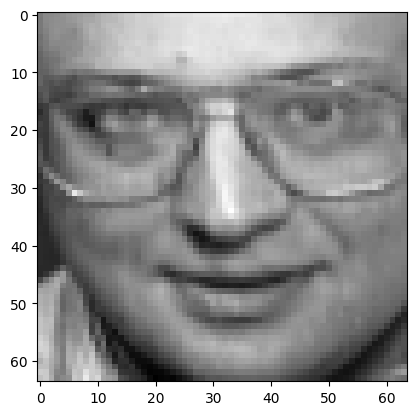

In [7]:
# Choose a figure to plot
img1=X.iloc[300].to_numpy().reshape(h,w)
plt.imshow(img1, cmap=plt.cm.gray)

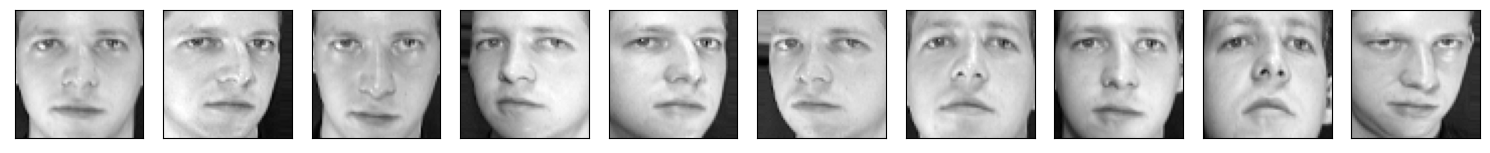

In [8]:
faces_tplot=df.drop(columns=['pid'])
n_row=1
n_col=10

plt.figure(figsize=(1.5 * n_col, 2.2 * n_row))
plt.subplots_adjust(0.6, 0.5, 1.5, 1.5)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(faces_tplot.iloc[i].to_numpy().reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()
plt.show()

#### 3.1. Rostro promedio. 

 Encuentre el rostro promedio, para ello calcule la media por columnas o la media por píxel y grafíquelo.

- El objetivo es  encontrar las características que hacen que los individuos sean diferentes a los demás. 

-  La razón por la que esto es necesario es porque queremos crear un sistema que pueda representar cualquier rostro. 

- Por lo tanto, calculamos los elementos que todas las caras tienen en común (la media). 

- Si extraemos esta media de las imagen, se aprecian las características que distinguen cada fotografía del resto del conjunto. Maximizamos la varianza!

In [9]:
# Utilice este espacio para escribir el código.
Xmean = df.drop(columns=[ 'pid']).mean(axis=0)

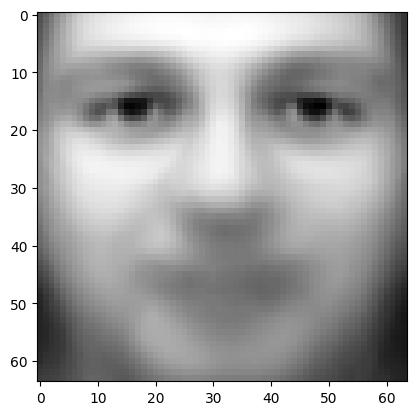

In [10]:
#plot the average face 
plt.imshow(Xmean.to_numpy().reshape((h, w)), cmap=plt.cm.gray)

#### 3.2. Reste el rostro promedio.

A cada una de las imágenes substraigale el rostro promedio.

In [11]:
Demean=df.drop(columns=['pid'])-Xmean 

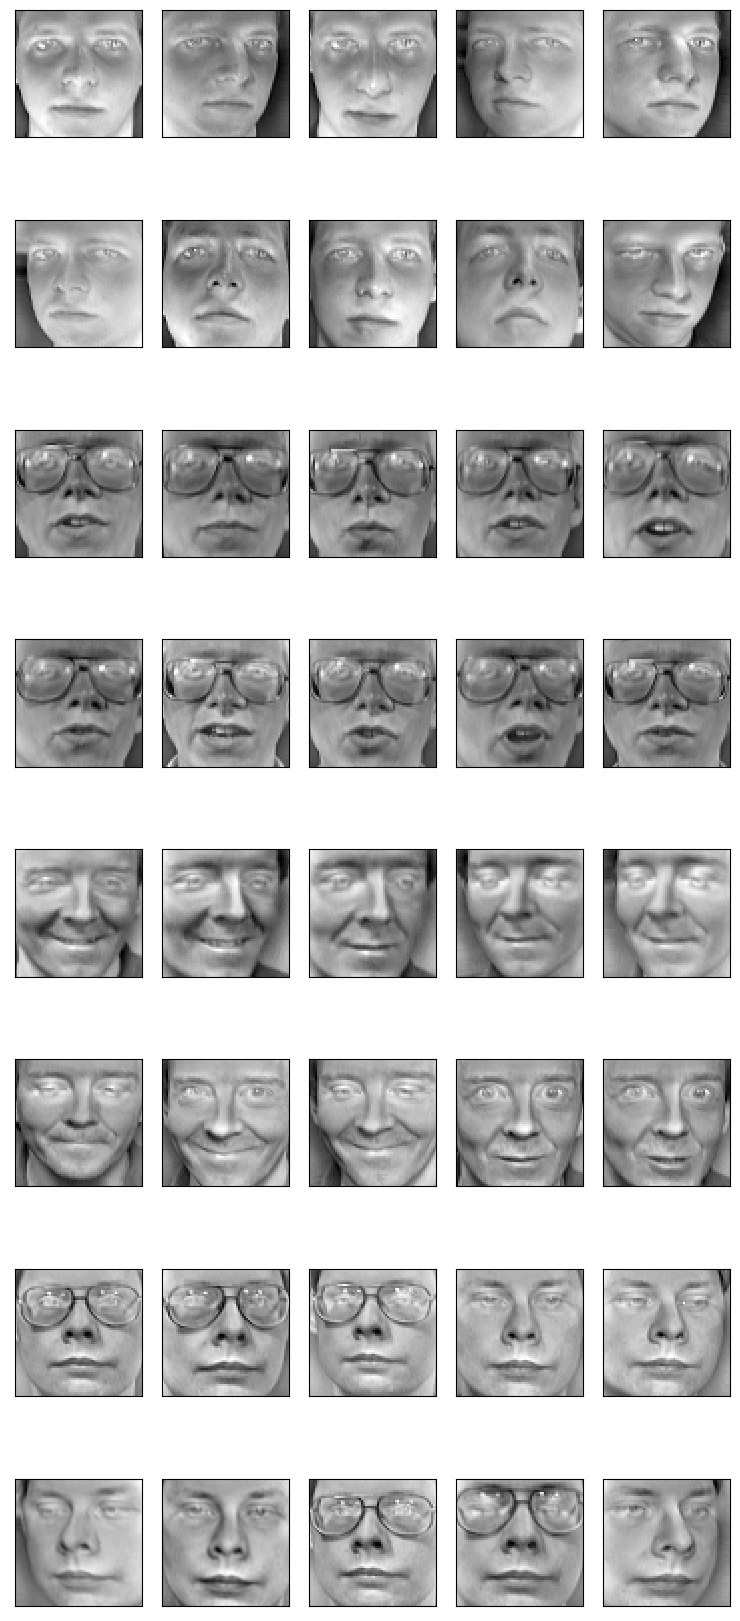

In [12]:
#Some examples
n_row=8
n_col=5

plt.figure(figsize=(1.5 * n_col, 2.2 * n_row))
plt.subplots_adjust(0.6, 0.5, 1.5, 1.5)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(Demean.iloc[i].to_numpy().reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()
plt.show()

#### 3.3. Descomposición en Valores Singulares 

Aplique la Descomposición en Valores Singulares a estas nuevas imágenes y retenga solo $K$ eigen vectores que mejor representen las imágenes. Justifique su elección.

In [13]:
from scipy.linalg import svd #pueden explorar con sklearn
U,S,Vt = svd(X)

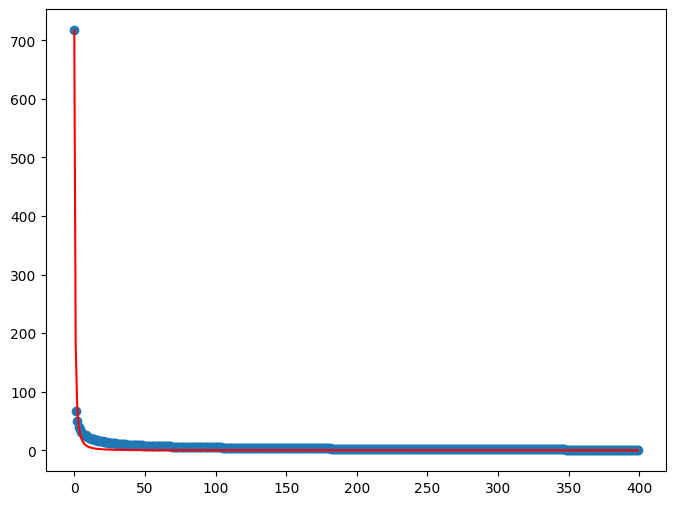

In [14]:
# observe cuan rapidamente caen los SVD
idx = range(len(S))
func = [S[0]/((i+1) ** 2) for i in idx ]

plt.figure(figsize = (8, 6))
plt.plot(idx, func, color = 'r')
plt.scatter(idx, S)

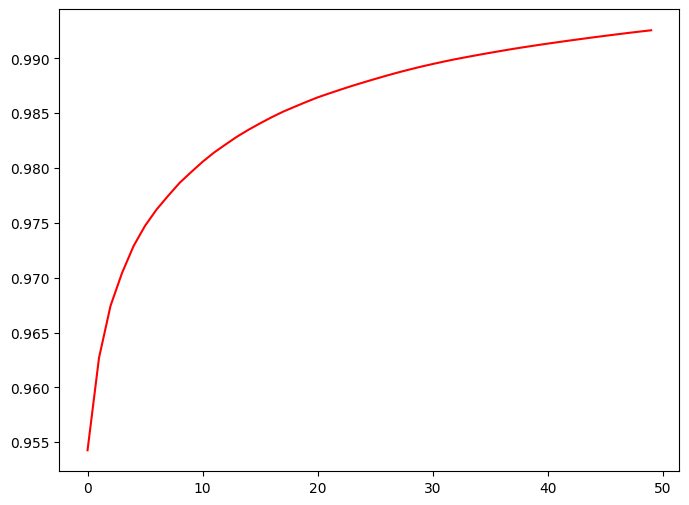

In [15]:
rg =50
idx = range(0,rg)
var_explained = np.round(S**2/np.sum(S**2), decimals=6)

cumsum=var_explained[0:rg].cumsum()

plt.figure(figsize = (8, 6))
plt.plot(idx,cumsum , color = 'r')


In [16]:
sum(var_explained[0:rg])

0.9925629720382858

In [17]:
n,k=X .shape

S2= np.resize(S,[n,1])*np.eye(n,k) #ponemos los valores singulares en una matriz diagonal

l = 10

reconstructed=np.dot(U[:,0:l],np.dot(S2[0:l,0:l],Vt[0:l,:]))
reconstructed = pd.DataFrame(reconstructed)
reconstructed

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.308735,0.368580,0.420690,0.462883,0.500986,0.565039,0.614440,0.649323,0.676052,0.695940,...,0.445536,0.426628,0.386315,0.342250,0.277422,0.228705,0.224218,0.197260,0.171472,0.179806
1,0.690193,0.735549,0.738543,0.728709,0.710729,0.710066,0.707659,0.714208,0.719308,0.715805,...,0.239383,0.214550,0.178120,0.147537,0.146989,0.143439,0.170882,0.191338,0.206384,0.207231
2,0.346579,0.413287,0.471038,0.509123,0.543811,0.601803,0.645052,0.675946,0.701344,0.718292,...,0.369718,0.343837,0.301274,0.259832,0.193036,0.146337,0.146911,0.122535,0.103420,0.118013
3,0.104492,0.092251,0.086460,0.108021,0.147828,0.202619,0.272623,0.356013,0.418344,0.472469,...,0.617378,0.638716,0.640916,0.644303,0.644390,0.651165,0.648331,0.614192,0.567762,0.536492
4,0.514831,0.562073,0.586470,0.600311,0.604296,0.623367,0.647311,0.684303,0.711840,0.726042,...,0.236882,0.215066,0.182482,0.155394,0.145114,0.134088,0.127976,0.133810,0.134746,0.135509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.421451,0.484430,0.542569,0.581677,0.620740,0.641027,0.663462,0.678503,0.689756,0.692013,...,0.279506,0.295236,0.311584,0.325179,0.298511,0.292139,0.280032,0.263025,0.247061,0.262445
396,0.281416,0.297524,0.311905,0.340880,0.369437,0.404733,0.461135,0.533881,0.582134,0.619443,...,0.500103,0.525360,0.539557,0.550778,0.557448,0.564678,0.530059,0.503469,0.463552,0.443827
397,0.518645,0.582653,0.629867,0.655410,0.675025,0.669893,0.679463,0.695586,0.704237,0.701925,...,0.208856,0.226401,0.251785,0.275093,0.269865,0.275527,0.247905,0.241068,0.229212,0.240346
398,0.171487,0.187368,0.204703,0.231241,0.264438,0.302516,0.361596,0.439626,0.494100,0.536965,...,0.587671,0.626104,0.639203,0.652318,0.640337,0.640031,0.603621,0.566293,0.518268,0.489751


In [18]:
imag10_index=df.loc[df['pid'] == 10].index
imag10=reconstructed.iloc[imag10_index]

imag10

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
100,0.387329,0.461496,0.578531,0.675951,0.740157,0.785807,0.822285,0.840037,0.845660,0.846210,...,0.323881,0.329301,0.317561,0.297595,0.238037,0.207333,0.150979,0.122696,0.121015,0.122265
101,0.426329,0.484800,0.583478,0.679166,0.743694,0.788090,0.824338,0.838835,0.841295,0.842701,...,0.331041,0.324583,0.312948,0.287416,0.248222,0.225633,0.180296,0.161878,0.162954,0.160315
102,0.418257,0.475277,0.572459,0.667907,0.732324,0.782268,0.822607,0.840372,0.845270,0.848251,...,0.349177,0.347014,0.336084,0.311959,0.273182,0.251269,0.208432,0.187808,0.186671,0.185685
103,0.394158,0.459000,0.565364,0.658751,0.718562,0.763928,0.794272,0.803490,0.803863,0.802262,...,0.361746,0.359832,0.331310,0.293420,0.232056,0.196728,0.153460,0.133725,0.141183,0.132390
104,0.582891,0.640144,0.697149,0.754598,0.789064,0.804408,0.809955,0.796465,0.780996,0.767914,...,0.335399,0.316756,0.290975,0.247622,0.219635,0.194266,0.179321,0.188385,0.200635,0.192302
105,0.456054,0.521392,0.621034,0.713374,0.772816,0.814598,0.846960,0.857753,0.857613,0.855901,...,0.302711,0.290779,0.273827,0.243315,0.200258,0.172814,0.127422,0.111884,0.115221,0.116107
106,0.496605,0.573187,0.676945,0.762268,0.812630,0.837529,0.851654,0.847089,0.836416,0.824563,...,0.304577,0.296717,0.271669,0.234074,0.177368,0.141632,0.093857,0.084558,0.096662,0.090342
107,0.590621,0.663433,0.744999,0.811635,0.848758,0.854173,0.852745,0.835118,0.814354,0.795317,...,0.337404,0.331382,0.313021,0.278895,0.235638,0.207029,0.171072,0.171381,0.184069,0.172530
108,0.507234,0.566686,0.651506,0.724266,0.767124,0.793135,0.806004,0.801477,0.791474,0.783013,...,0.386487,0.377391,0.345174,0.303513,0.252528,0.223073,0.196982,0.187864,0.201617,0.185127
109,0.404240,0.475231,0.587862,0.686043,0.748962,0.796406,0.830607,0.842989,0.845539,0.844162,...,0.282354,0.274584,0.251055,0.217637,0.161029,0.127182,0.077751,0.059034,0.065777,0.067837


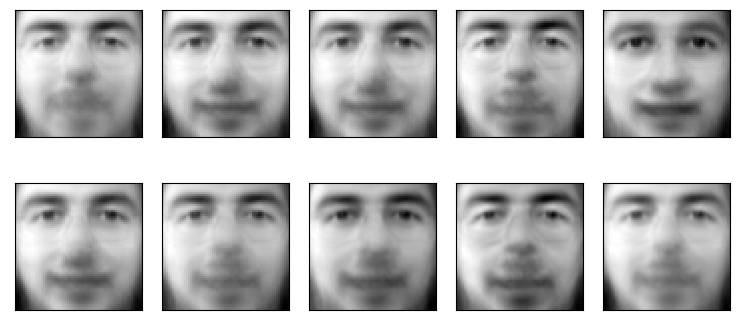

In [19]:
# Graficamos
n_row=2
n_col=5

plt.figure(figsize=(1.5 * n_col, 2.2 * n_row))
plt.subplots_adjust(0.6, 0.5, 1.5, 1.5)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(imag10.iloc[i].to_numpy().reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()
plt.show()

# Información de Sesión

In [ ]:
import session_info

session_info.show(html=False)